# Natural Language Processing 2 - Addtional Topics

### Reference Links -
1. CountVector Function Details - https://kavita-ganesan.com/how-to-use-countvectorizer/#.Xr5vkmgzY2w
2. Text PreProcessing Step - https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
3. Word Clouds - https://www.datacamp.com/community/tutorials/wordcloud-python
4. Naive Bayes - https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
5. NB for NLP - https://towardsdatascience.com/implementing-a-naive-bayes-classifier-for-text-categorization-in-five-steps-f9192cdd54c3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the data from dataset
data = pd.read_csv('data/SMSSpamCollection', sep='\t' , names=['label','message'])

In [ ]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


#### **Exploratory Data Analysis (EDA)**

In [ ]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

### Visual  EDA

In [ ]:
data['msgLen']=data.message.apply(len)
data.head()

,label,message,msgLen
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

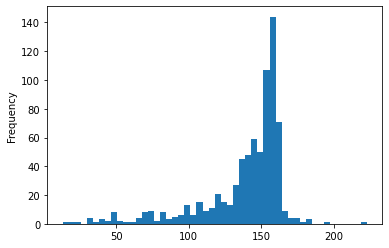

In [ ]:
data[data['label']=='spam'].msgLen.plot(bins=50,kind='hist')

<AxesSubplot:ylabel='Frequency'>

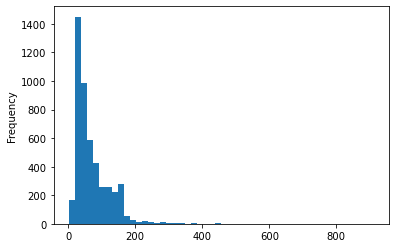

In [ ]:
data[data['label']=='ham'].msgLen.plot(bins=50,kind='hist')

In [ ]:
data[data['label']=='spam'].msgLen.max()

223

In [ ]:
data[data['label']=='spam'].msgLen.mean()

138.6706827309237

In [ ]:
data[data['label']=='spam'].msgLen.min()

13

In [ ]:
data[data['label']=='ham'].msgLen.max()

910

In [ ]:
data[data['label']=='ham'].msgLen.mean()

71.48248704663213

In [ ]:
data[data['label']=='ham'].msgLen.min()

2

In [ ]:
data.groupby('label').msgLen.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482487,58.440652,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


In [ ]:
def textPreprocessing(data):
    #Remove Punctuation Logic
    import string
    removePunctuation = [char for char in data if char not in string.punctuation]
    
    #Join Chars to form sentences
    sentenceWithoutPunctuations = ''.join(removePunctuation)
    sentence = sentenceWithoutPunctuations.split()
    
    #StopwordRemoval
    from nltk.corpus import stopwords
    removeStopwords = [word for word in sentence if word.lower() not in stopwords.words('english')]
    
    return removeStopwords

In [ ]:
#Text preprocessing
data['message'].head().apply(textPreprocessing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
data.head()

,label,message,msgLen
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Create Bag of Words - sklearn package CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
?CountVectorizer
#1. lowercases your text (set lowercase=false if you don’t want lowercasing)
#2. performs tokenization (converts raw text to smaller units of text)
#3. uses word level tokenization (meaning each word is treated as a separate token)
#4. ignores single characters during tokenization (say goodbye to words like ‘a’ and ‘I’)

In [ ]:
bow = CountVectorizer(analyzer=textPreprocessing,min_df=3).fit(data['message'])

In [ ]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
bow.vocabulary_

{'Go': 447,
 'point': 2356,
 'crazy': 1436,
 'Available': 221,
 'bugis': 1277,
 'n': 2194,
 'great': 1771,
 'world': 3036,
 'la': 1957,
 'e': 1552,
 'got': 1765,
 'wat': 2965,
 'Ok': 705,
 'lar': 1966,
 'wif': 3002,
 'u': 2885,
 'oni': 2259,
 'Free': 416,
 'entry': 1588,
 '2': 65,
 'wkly': 3021,
 'comp': 1400,
 'win': 3006,
 'Cup': 329,
 'final': 1666,
 'tkts': 2830,
 '21st': 73,
 'May': 624,
 '2005': 71,
 'Text': 910,
 '87121': 167,
 'receive': 2446,
 'txt': 2879,
 'apply': 1130,
 'U': 944,
 'dun': 1550,
 'say': 2532,
 'early': 1554,
 'c': 1289,
 'already': 1100,
 'Nah': 671,
 'dont': 1524,
 'think': 2803,
 'goes': 1756,
 'usf': 2915,
 'lives': 2020,
 'around': 1143,
 'though': 2811,
 'FreeMsg': 417,
 'Hey': 492,
 'darling': 1464,
 '3': 89,
 'weeks': 2984,
 'word': 3030,
 'back': 1180,
 'Id': 519,
 'like': 2008,
 'fun': 1720,
 'still': 2704,
 'ok': 2252,
 'std': 2702,
 'send': 2563,
 '£150': 3093,
 'Even': 386,
 'brother': 1270,
 'speak': 2676,
 'treat': 2861,
 'per': 2308,
 'request'

In [ ]:
len(bow.vocabulary_)

3113

In [ ]:
message_bow = bow.transform(data['message'])

In [ ]:
message_bow.shape

(5572, 3113)

In [ ]:
pd.DataFrame(message_bow.toarray()).head()

,0,1,2,3,4,5,6,7,8,9,...,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Working With N-Grams - Word level – bigrams only**

In [ ]:
bow2gram = CountVectorizer(min_df=3,ngram_range=(2,2)).fit(data['message'])

In [ ]:
bow2gram.vocabulary_

{'ok lar': 2954,
 'free entry': 1300,
 'entry in': 1164,
 'wkly comp': 4789,
 'to win': 4220,
 'cup final': 947,
 'to 87121': 4094,
 'to receive': 4181,
 'std txt': 3670,
 'txt rate': 4314,
 'rate apply': 3296,
 'so early': 3560,
 'don think': 1090,
 'think he': 4016,
 'to usf': 4214,
 'here though': 1705,
 'freemsg hey': 1321,
 'hey there': 1709,
 'it been': 2027,
 'week now': 4589,
 'now and': 2833,
 'some fun': 3601,
 'you up': 5022,
 'up for': 4349,
 'for it': 1253,
 'it still': 2066,
 'to send': 4188,
 '50 to': 125,
 'even my': 1172,
 'my brother': 2630,
 'is not': 1990,
 'not like': 2809,
 'like to': 2269,
 'with me': 4771,
 'me they': 2474,
 'me like': 2450,
 'as per': 421,
 'per your': 3164,
 'your request': 5096,
 'request melle': 3365,
 'melle melle': 2503,
 'melle oru': 2504,
 'oru minnaminunginte': 3094,
 'minnaminunginte nurungu': 2528,
 'nurungu vettam': 2880,
 'vettam has': 4451,
 'has been': 1600,
 'been set': 552,
 'set as': 3476,
 'as your': 428,
 'your callertune': 5

In [ ]:
len(bow.vocabulary_)

3113

In [ ]:
# Word Cloud - https://www.datacamp.com/community/tutorials/wordcloud-python
## conda install -c conda-forge wordcloud
## conda update --all
import wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

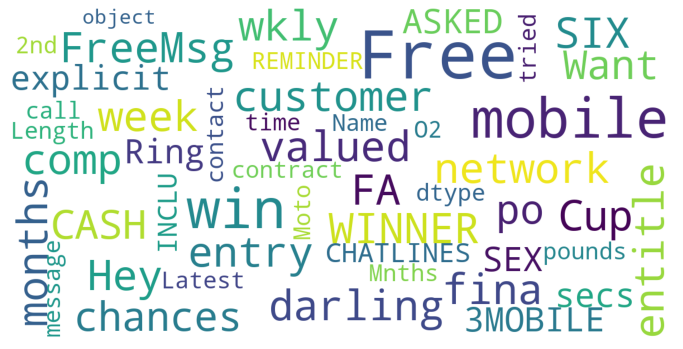

In [ ]:
#show_wordcloud()
show_wordcloud(data[data['label']=='spam'].message)

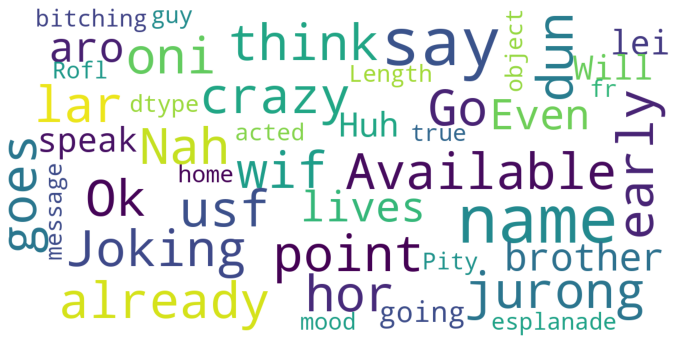

In [ ]:
show_wordcloud(data[data['label']=='ham'].message)

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
?TfidfTransformer

In [ ]:
tfidfData = TfidfTransformer(use_idf=False).fit(message_bow)
tfidfDataFinal = tfidfData.transform(message_bow)

In [ ]:
tfidfData = TfidfTransformer(use_idf=True).fit(message_bow)
tfidfDataFinal = tfidfData.transform(message_bow)

In [ ]:
print(tfidfData.idf_[bow.vocabulary_['WINNER']])

8.239394426449646


In [ ]:
tfidfDataFinal.shape 

(5572, 3113)

In [ ]:
pd.DataFrame(tfidfDataFinal.toarray()).tail()

,0,1,2,3,4,5,6,7,8,9,...,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.343217,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Classification Machine Learning Model 

In [ ]:
# Data is ready to be supplied in a machine learning algo

In [ ]:
#Training the model --- NaiveBayes Algo
#Handling String data ---- MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(tfidfDataFinal,data['label'])

In [ ]:
model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
trainPred=model.predict(tfidfDataFinal)

In [ ]:
pd.crosstab(data['label'],trainPred)

col_0,ham,spam
label,,
ham,4823,2
spam,81,666


In [ ]:
inputData = 'Win Lottery Guaranteed'
l1 = textPreprocessing(inputData)
l2 = bow.transform(l1)
l3 = tfidfData.transform(l2)

In [ ]:
prediction = model.predict_proba(l3[0])
prediction

array([[0.35742415, 0.64257585]])